In [1]:
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import numpy as np
from skimage.filters import rank

from skimage.segmentation import watershed
from skimage.morphology import disk, square
from skimage.feature import peak_local_max

def pyplot_image_show(image,cmap = 'gray',alpha = 1):
    plt.figure()
    plt.imshow(image,cmap=cmap,alpha = alpha)
    plt.title(str((image.min(),image.max())))
    
def concatenate_images(image1,image2,alpha_2):
    plt.figure()
    plt.imshow(image1, cmap='gray')
    plt.imshow(image2, alpha=alpha_2, cmap='gray')
    #plt.title(str((image.min(),image.max())))

# Загружаем Изображение

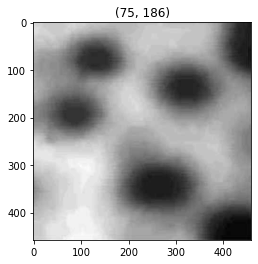

In [2]:
image_stock = cv2.imread("vodorazdel.png", cv2.IMREAD_GRAYSCALE)
pyplot_image_show(image_stock)

# Denoise image

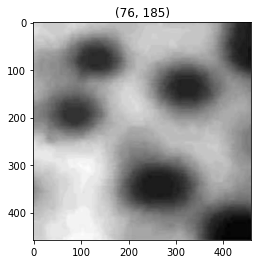

In [3]:
image_denoised =  rank.median(image_stock, disk(2))
image_stock = image_denoised
pyplot_image_show(image_stock)

# Найдем Морфологический градиент изображения

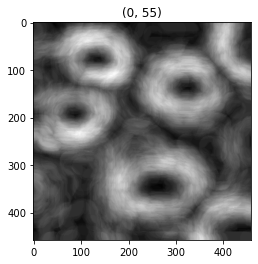

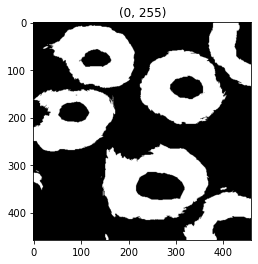

In [4]:
kernel_size = 35


kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernel_size,kernel_size))
morph_gradient = cv2.morphologyEx(image_stock,cv2.MORPH_GRADIENT,kernel)
_,threshold = cv2.threshold(morph_gradient,0,255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
pyplot_image_show(morph_gradient)
image_bin = np.copy(morph_gradient)
image_bin[image_bin >= threshold] = 255
image_bin[image_bin < threshold] = 0
pyplot_image_show(image_bin) 

# Применяем Watershed
# Находим Markers

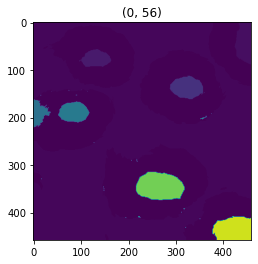

In [5]:
markers_prep = morph_gradient < threshold
markers = ndi.label(markers_prep)[0]
pyplot_image_show(markers,cmap='viridis')

# Запускаем собственно сам Watershed

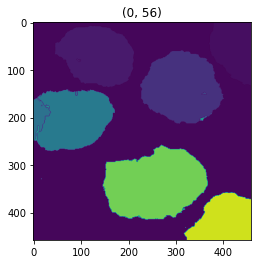

In [6]:
labels = watershed(image_stock, markers, watershed_line=True)
pyplot_image_show(labels,cmap='viridis')

# Выделяем границы, накладываем на градиент.

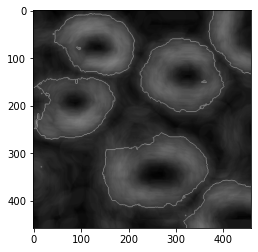

In [7]:
contours = labels==0
concatenate_images(morph_gradient,contours,0.5)

# И наложение на исходник

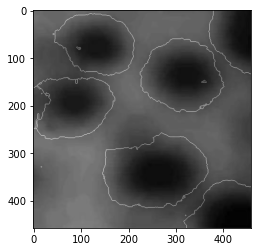

In [8]:
concatenate_images(image_stock,contours,0.5)

c:\python 3.7.7\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


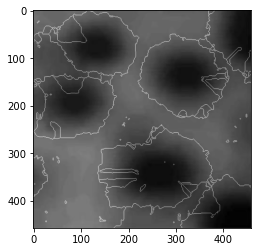

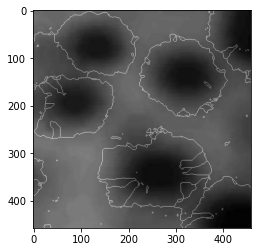

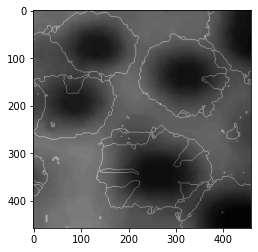

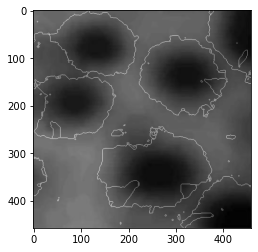

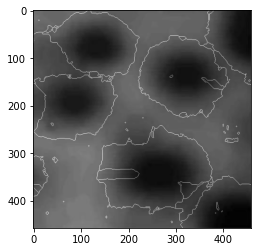

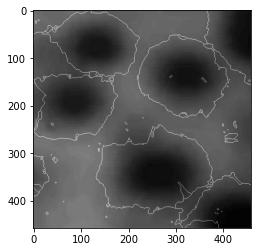

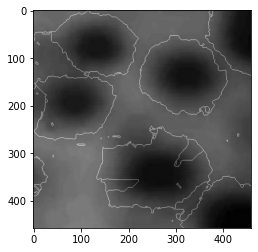

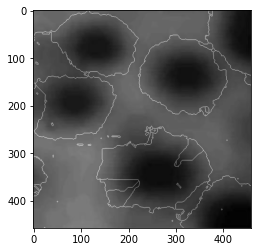

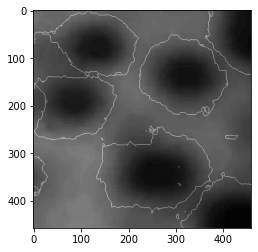

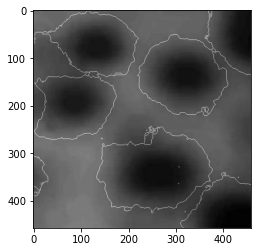

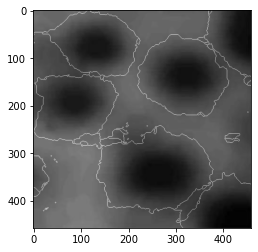

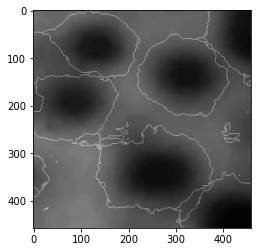

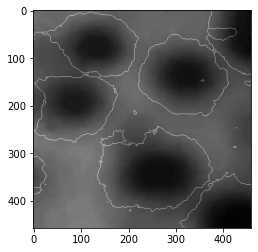

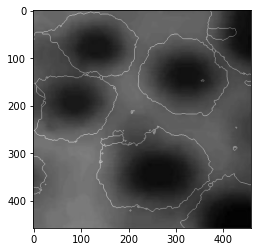

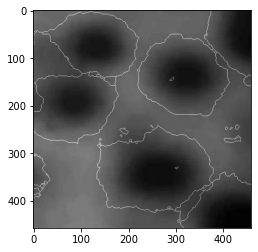

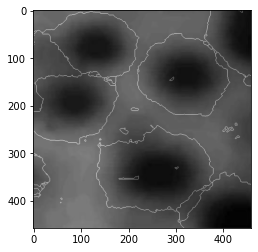

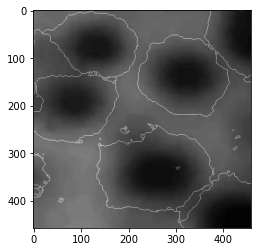

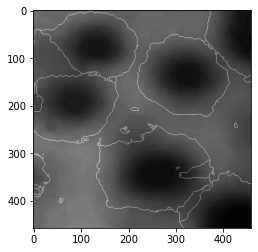

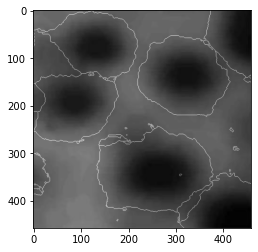

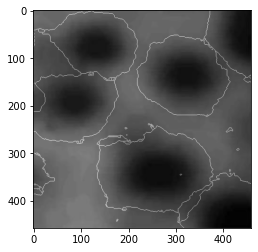

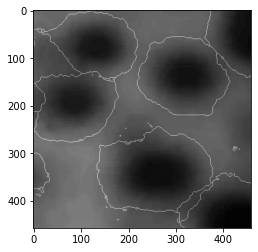

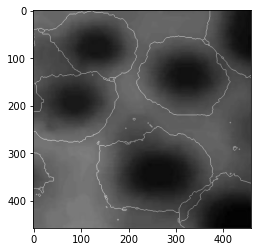

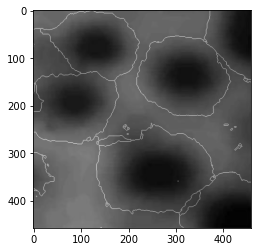

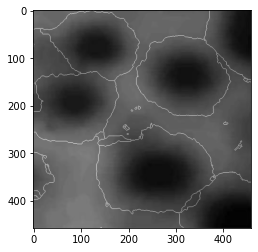

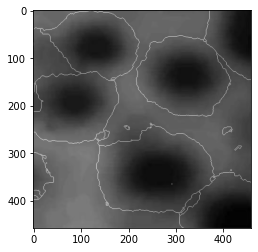

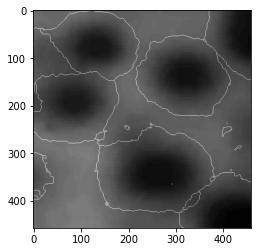

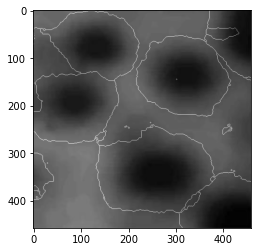

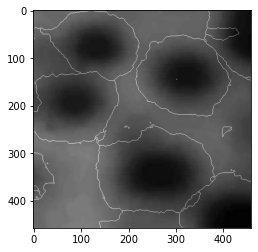

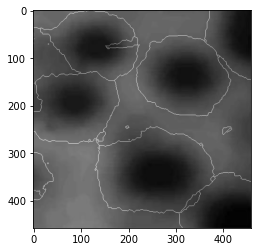

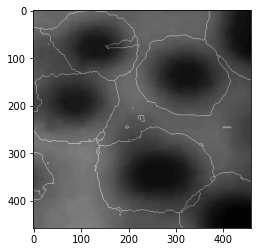

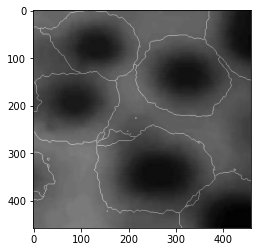

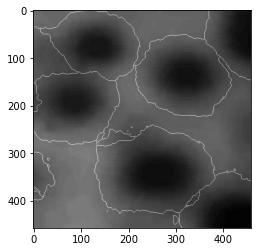

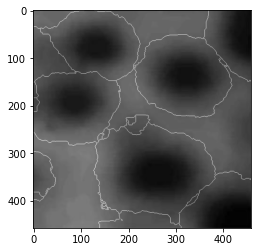

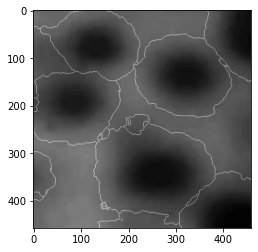

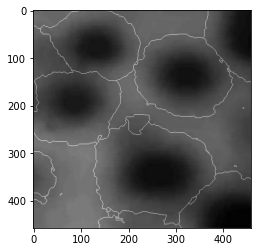

In [9]:
# А здесь все то же самое, только в 1 ячейке. Я подбирал.

kernel_sizes = np.arange(16,51)

for kernel_size in kernel_sizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernel_size,kernel_size))
    morph_gradient = cv2.morphologyEx(image_denoised,cv2.MORPH_GRADIENT,kernel)
    threshold = np.max(morph_gradient)//3
    #pyplot_image_show(morph_gradient)
    markers_prep = morph_gradient < threshold
    markers = ndi.label(markers_prep)[0]
    #pyplot_image_show(markers,cmap='viridis')
    labels = watershed(image_stock, markers, watershed_line=True)
    #pyplot_image_show(labels,cmap='viridis')
    contours = labels==0
    concatenate_images(image_stock,contours,0.5)
